Que 1.
The delivery_time.csv dataset contains information about Delivery time and Sorting Time. We have to prepare linear regression and polynimial regression model to predict Sorting time on the basis of Delivery Time. Also evaluate the model by using evaluation metrics.


In [2]:
import warnings 
warnings.filterwarnings(action='ignore')

### import required packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### load the data

In [4]:
df = pd.read_csv("delivery_time.csv")
df

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [5]:
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [6]:
df.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


### EDA


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 468.0 bytes


In [8]:
df.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [9]:
df.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [10]:
df.isnull().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

### visualize the data

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

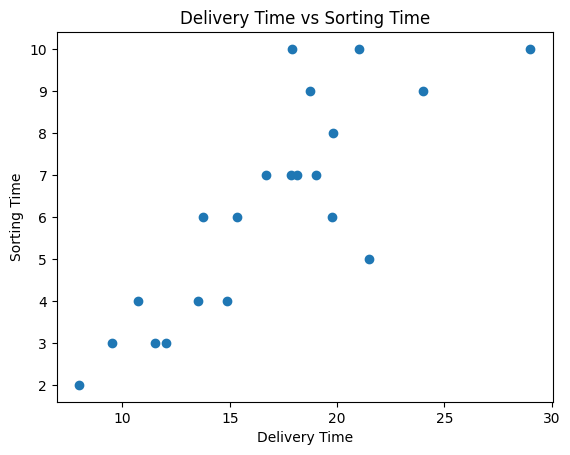

In [11]:
plt.scatter(df['Delivery Time'],df['Sorting Time'])
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.title("Delivery Time vs Sorting Time")
plt.legend

### split the data

In [12]:
x= df.drop('Sorting Time',axis =1)

y = df['Sorting Time']

### model building

In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x,y)

LinearRegression()

In [18]:
prediction = model.predict([[15]])
prediction

array([5.44948105])

### model evaluation

In [ ]:
model.score(x,y)

0.682271474841723

In [34]:
y

0     10
1      4
2      6
3      9
4     10
5      6
6      7
7      3
8     10
9      9
10     8
11     4
12     7
13     3
14     3
15     4
16     6
17     7
18     2
19     7
20     5
Name: Sorting Time, dtype: int64

In [51]:
from sklearn.model_selection import train_test_split

x_train ,x_test,y_train,y_test=train_test_split(
    x,y,train_size=0.8,random_state=123456
)

In [52]:
from sklearn.linear_model import LinearRegression 
model = LinearRegression() 
model.fit(x_test, y_test)

LinearRegression()

In [53]:
y_pred = model.predict(x_test)

### model evaluation

In [54]:
from sklearn.metrics import mean_absolute_error
mas =mean_absolute_error(y_test,y_pred)
mas

1.5381836101160784

In [55]:
from sklearn.metrics import root_mean_squared_error
rmse =root_mean_squared_error(y_test,y_pred)
rmse

1.725681624632692

In [56]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test,y_pred)
mse

2.9779770695949273

In [57]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
r2

0.2555057326012682

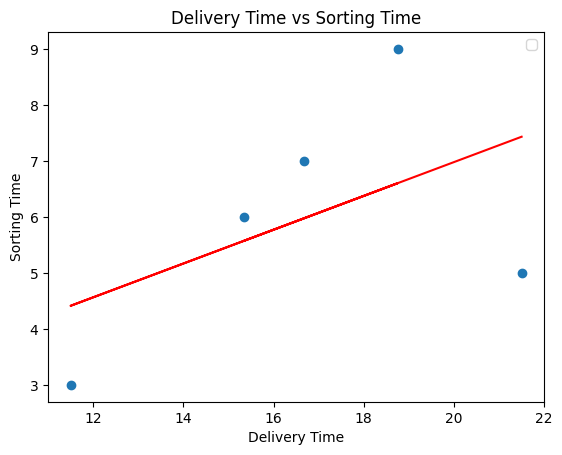

In [61]:
plt.scatter(x_test,y_test)
plt.plot(x_test,y_pred,color="red")
plt.xlabel("Delivery Time")
plt.ylabel("Sorting Time")
plt.title("Delivery Time vs Sorting Time")
plt.legend()